## Introduction to Image Processing with Python
### Image Processing (RM1-VIS)
### University of Southern Denmark

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [97]:
def plotImage(image, title):
    if(len(image.shape) == 2):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

#### White balance
Perform 'manual' white balancing on the image which has un-natural colors. You can determine a pixel location manually which serves as input for the white balancing.

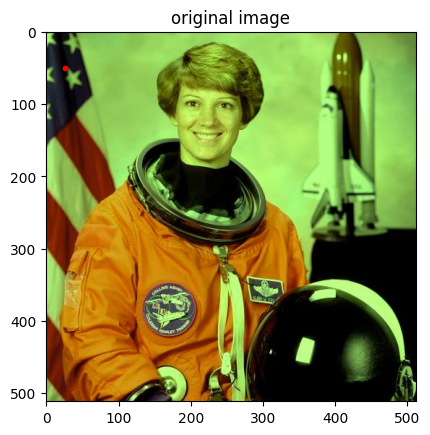

In [98]:
imageAstronaut = skimage.io.imread('C:\\Users\\marij\\Downloads\\images\\images\\astronaut_wb.jpg')

plt.imshow(imageAstronaut)
plt.title("original image")
plt.scatter(25, 50, s=10, c='red', marker='o')


In [99]:
def white_balance(img, coords):
    img = img.astype(np.float32)
    coords = np.array([coords]) if isinstance(coords, tuple) else np.array(coords)
    ref_pixel = img[coords[:, 1], coords[:, 0]] #img[y, x] returns ve vector of R, G, B values
    mean_ref = np.mean(ref_pixel, axis=0)
    target = np.mean(mean_ref)
    scale = target / mean_ref
    img_balanced = img * scale[np.newaxis, np.newaxis, :]
    img_balanced = np.clip(img_balanced, 0, 255)
    img = img_balanced.astype(np.uint8)
        
    return img

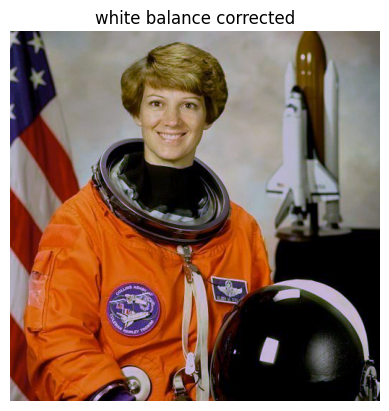

In [100]:
plotImage(white_balance(imageAstronaut, (100, 150)), "white balance corrected")

#### RGB to HSI
Implement the RGB to HSI function.

In [101]:
def rgb2hsi(r, g, b):
    v = (r + g + b) / 3.0
    s = np.where(v == 0, 0, 1 - np.min([r, g, b], axis=0) / v)
    h = np.zeros_like(v)

    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
    theta = np.arccos(np.clip(num / (den + 1e-10), -1, 1))  # Avoid division by zero

    h = np.where(b <= g, theta, 2 * np.pi - theta)
    h = np.degrees(h)  # Convert radians to degrees

    return h, s, v

#### Histogram Equalization

Apply histogram equalization to a color image. You can adapt your implementation from week 1. 

In [102]:
def histeq_color(image):
    img = image.astype(np.float32) / 255.0  # Corrected from img to image
    R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    H, S, V = rgb2hsi(R, G, B)
    
    V_flat = (V * 255).astype(np.uint8).flatten()
    hist, bins = np.histogram(V_flat, bins=256, range=[0, 256])
    cdf = hist.cumsum()
    cdf_normalized = (cdf * cdf.min()) * 255 / (cdf.max() - cdf.min())
    V_eq = cdf_normalized[V_flat].reshape(V.shape) / 255.0
    
    H = H * 2 * np.pi
    R_out = np.zeros_like(V)
    G_out = np.zeros_like(V)
    B_out = np.zeros_like(V)
    
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            h = H[i, j]
            s = S[i, j]
            v = V_eq[i, j]
            if h < 2 * np.pi / 3:
                R_out[i, j] = v * (1 + s * np.cos(h) / np.cos(np.pi / 3 - h))
                G_out[i, j] = 3 * v - (R_out[i, j] + B_out[i, j])
                B_out[i, j] = v * (1 - s)
            elif h < 4 * np.pi / 3:
                h = h - 2 * np.pi / 3
                G_out[i, j] = v * (1 + s * np.cos(h) / np.cos(np.pi / 3 - h))
                B_out[i, j] = 3 * v - (R_out[i, j] + G_out[i, j])
                R_out[i, j] = v * (1 - s)
            else:
                h = h - 4 * np.pi / 3
                B_out[i, j] = v * (1 + s * np.cos(h) / np.cos(np.pi / 3 - h))
                R_out[i, j] = 3 * v - (G_out[i, j] + B_out[i, j])
                G_out[i, j] = v * (1 - s)
    image = np.stack([R_out, G_out, B_out], axis=2)
    image = np.clip(image * 255, 0, 255).astype(np.uint8)

    return image

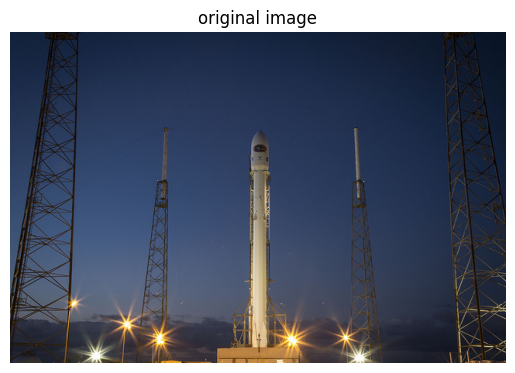

C:\Users\marij\AppData\Local\Temp\ipykernel_31168\3293610908.py:3: RuntimeWarning: invalid value encountered in divide
  s = np.where(v == 0, 0, 1 - np.min([r, g, b], axis=0) / v)


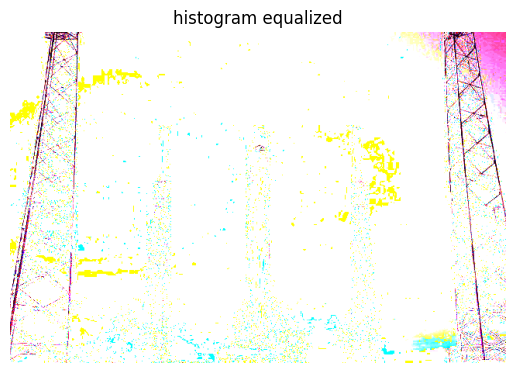

In [103]:
imageRocket = skimage.data.rocket()

plotImage(imageRocket, "original image")
plotImage(histeq_color(imageRocket), "histogram equalized")

#### Red eye correction

Photos taken with a flash close to the image lens can cause the 'red eye effect'. https://en.wikipedia.org/wiki/Red-eye_effect

Implement red eye reduction by segmenting based on a suitable color space. Then correct by de-saturating and reducing intensity within the segmentation.

In [104]:
imageRedEyes = skimage.io.imread("images/BoldRedEye.JPG")

FileNotFoundError: No such file: 'c:\Users\marij\Downloads\images\BoldRedEye.JPG'

In [ ]:
# standard median filtering of image
def red_eye_correction(image):
    return image

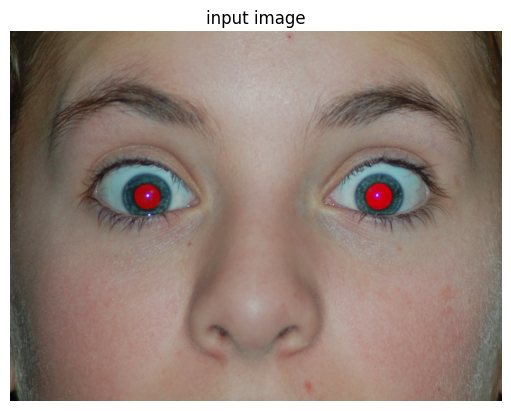

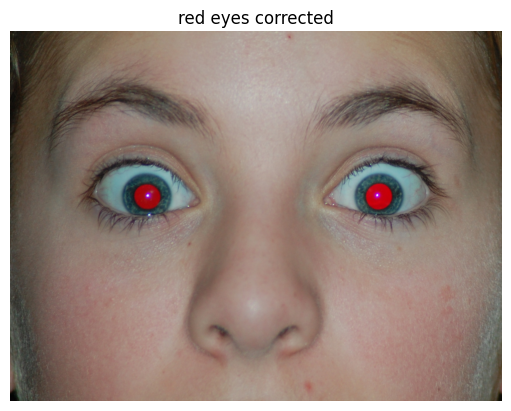

In [ ]:
plotImage(imageRedEyes, "input image")
plotImage(red_eye_correction(imageRedEyes), "red eyes corrected")

##### Optional: improve the red eye correction algorithm by filtering the segmentation to only contain circular blobs.